# Introduction and Background

### Research Question

The aim of our project is to find trends between different injuries and fatalities caused by car accidents. We want to learn if car accidents are more prone with certain age groups, models of cars, or a certain geographical area. 

### Overview

To answer our research question, we will only be focusing on injuries and fatalities that have occured in the United States. We were able to find several datasets providing detailed information of the occurences injuries/fatalities. ALthough there were datasets that had global information, we thought that it be easier to analyze our results if only looking at the United States. Partly because we are more familiar with how navigating a vehicle works in the United States. 

We decided to analyze car accidents within the time frame __ . We think that no matter what time fram we decide to analyze, our end results should ultimately reflect the averages of car accidents in any given year. 

### Hypothesis

We believe that there are trends between differet injuries/fatalies caused by car accidents. In particular, we believe that the types of cars involve in the car accident does influence the outcome. In addition, we believe that certain age groups are more prone to be in car accidents than others. We hope to answer these hyphothesis as well as uncover other trends in our data sets.

### Background

Automobiles are a great tool that we all used in our daily lives to get around, yet automobiles form a large portion of the fatalites and injuries in the United States. In our project, we want to examine fatalities and injuries caused by motor vehicles to see the similarites that exist. Most car accidents do go reported and the data collected is very detailed. For example, the make and model of the car, age of driver, severity of accident, etc for the most part are collected.



### Datasets

### Data Gathering, Wrangling, and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

df_acc = pd.read_csv('ACCIDENT.csv')
df_per = pd.read_csv('PERSON.csv')

In [3]:
df_acc.head(5)

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,2,1,1,0,0,1,1,121,...,99,6,15,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,2,2,127,...,99,0,59,88,88,20,0,0,2,0
2,1,10003,2,2,0,0,0,2,2,21,...,99,23,10,99,99,0,0,0,1,0
3,1,10004,1,1,0,0,0,2,2,3,...,99,13,14,88,88,0,0,0,1,0
4,1,10005,2,2,0,0,0,2,2,73,...,99,7,28,88,88,0,0,0,1,0


In [4]:

df_acc.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [5]:
df_acc['CF2'].value_counts()

0     33128
99      322
23       64
19       40
27       23
14       22
15       22
20       11
28        7
26        4
22        2
5         2
4         2
3         2
18        1
6         1
2         1
Name: CF2, dtype: int64

In [6]:
df_acc=df_acc.drop(columns=['STATE', 'VE_FORMS', 'PVH_INVL','PERMVIT', 'PERNOTMVIT', 'COUNTY','CITY', 'DAY', 'MONTH', 'YEAR', 'DAY_WEEK', 'MINUTE', 
                            'NHS', 'RUR_URB', 'FUNC_SYS', 'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR',
                            'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2','TYP_INT', 'WEATHER1', 'WEATHER2', 'RAIL', 'NOT_HOUR','NOT_MIN', "ARR_HOUR",
                            'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3'])
df_acc
                    

,ST_CASE,VE_TOTAL,PEDS,PERSONS,HOUR,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,FATALS,DRUNK_DR
0,10001,2,0,1,6,0,2,4,1,0,1,0
1,10002,1,0,2,0,0,3,2,2,0,2,0
2,10003,2,0,2,22,1,4,2,10,0,1,0
3,10004,1,0,2,13,0,4,1,10,0,1,0
4,10005,2,0,2,7,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33649,560097,1,0,1,2,0,6,2,1,0,1,1
33650,560098,2,0,2,10,0,1,1,3,0,1,0
33651,560099,1,0,1,18,0,3,2,11,0,1,0
33652,560100,1,0,2,13,0,4,1,1,0,1,1


In [7]:
df_per.head(5)

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,121,5,1,6,...,600,0,0,0,0,0,1,7,2,0
1,1,10002,1,1,1,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
2,1,10002,1,1,2,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
3,1,10003,2,1,1,0,21,8,1,22,...,2250,0,0,0,0,0,0,7,1,0
4,1,10003,2,2,1,0,21,8,1,22,...,8888,999,99,0,0,0,8,0,0,0


In [8]:

df_per.columns

Index(['STATE', 'ST_CASE', 'VE_FORMS', 'VEH_NO', 'PER_NO', 'STR_VEH', 'COUNTY',
       'DAY', 'MONTH', 'HOUR', 'MINUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV',
       'MAN_COLL', 'SCH_BUS', 'MAKE', 'MAK_MOD', 'BODY_TYP', 'MOD_YEAR',
       'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER', 'IMPACT1', 'FIRE_EXP',
       'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE', 'REST_MIS',
       'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT', 'DRINKING', 'ALC_DET',
       'ALC_STATUS', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DRUG_DET', 'DSTATUS',
       'HOSPITAL', 'DOA', 'DEATH_DA', 'DEATH_MO', 'DEATH_YR', 'DEATH_HR',
       'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS', 'P_SF1', 'P_SF2',
       'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'],
      dtype='object')

In [9]:
df_per['MAKE'].value_counts()

12.0    11002
20.0    10655
49.0     6745
37.0     5361
7.0      4953
        ...  
10.0        4
74.0        3
43.0        2
64.0        1
25.0        1
Name: MAKE, Length: 67, dtype: int64

In [10]:
df_per=df_per.drop(columns=['STATE','SCH_BUS', 'VE_FORMS', 'STR_VEH', 'COUNTY', 'DAY', 'MONTH', 'MINUTE', 'RUR_URB', 'FUNC_SYS',
                            'HARM_EV', 'MAN_COLL', 'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER',
                            'IMPACT1', 'FIRE_EXP',  'PER_TYP', 'SEAT_POS', 'REST_MIS', 'AIR_BAG',
                            'EJ_PATH', 'EXTRICAT', 'ALC_STATUS','ATST_TYP', 'ALC_RES', 'DSTATUS', 'HOSPITAL', 'DOA', 'DEATH_DA',
                            'DEATH_MO', 'DEATH_YR', 'DEATH_HR', 'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS','P_SF1', 'P_SF2',
                            'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'])
df_per.head()
                            

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,SEX,INJ_SEV,REST_USE,EJECTION,DRINKING,ALC_DET,DRUGS,DRUG_DET
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,1,4,20,2,0,9,0,8
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,1,4,20,1,9,9,9,8
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,1,4,3,0,8,9,8,8
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,2,4,20,0,0,9,9,8
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,1,2,20,0,0,9,0,8


In [11]:
COLOR_MAP = {0 : '#461969ff',
            1 : '#45337dff',
            2 : '#3c4f8aff',
            3 : '#33638dff',
            4 : '#29788eff',
            5 : '#25a186ff',
            6 : '#35b479ff',
            7 : '#5cc863ff',
            8 : '#c3df2eff',
            9 : '#fde725ff'
           }

In [12]:
df_per.INJ_SEV.unique()

array([4, 2, 0, 3, 1, 9, 5, 6])

In [13]:
inj_str = ['No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury', 
        'Suspected Serious Injury', 'Fatal Injury', 'Injured, Severity Unknown', 
        'Died Prior to Crash', '','','Unknown']
#for i in range(0,10):
#    if injury = i:
#        injury = inj_str(i)

In [14]:
def change_inj(injury):
    for i in range(0,10):
        if injury == i:
            injury = inj_str[i]
    return injury

In [15]:
df_per['INJ_lvl'] = df_per.INJ_SEV.apply(change_inj)

Plotting Injury severity across all cases and people

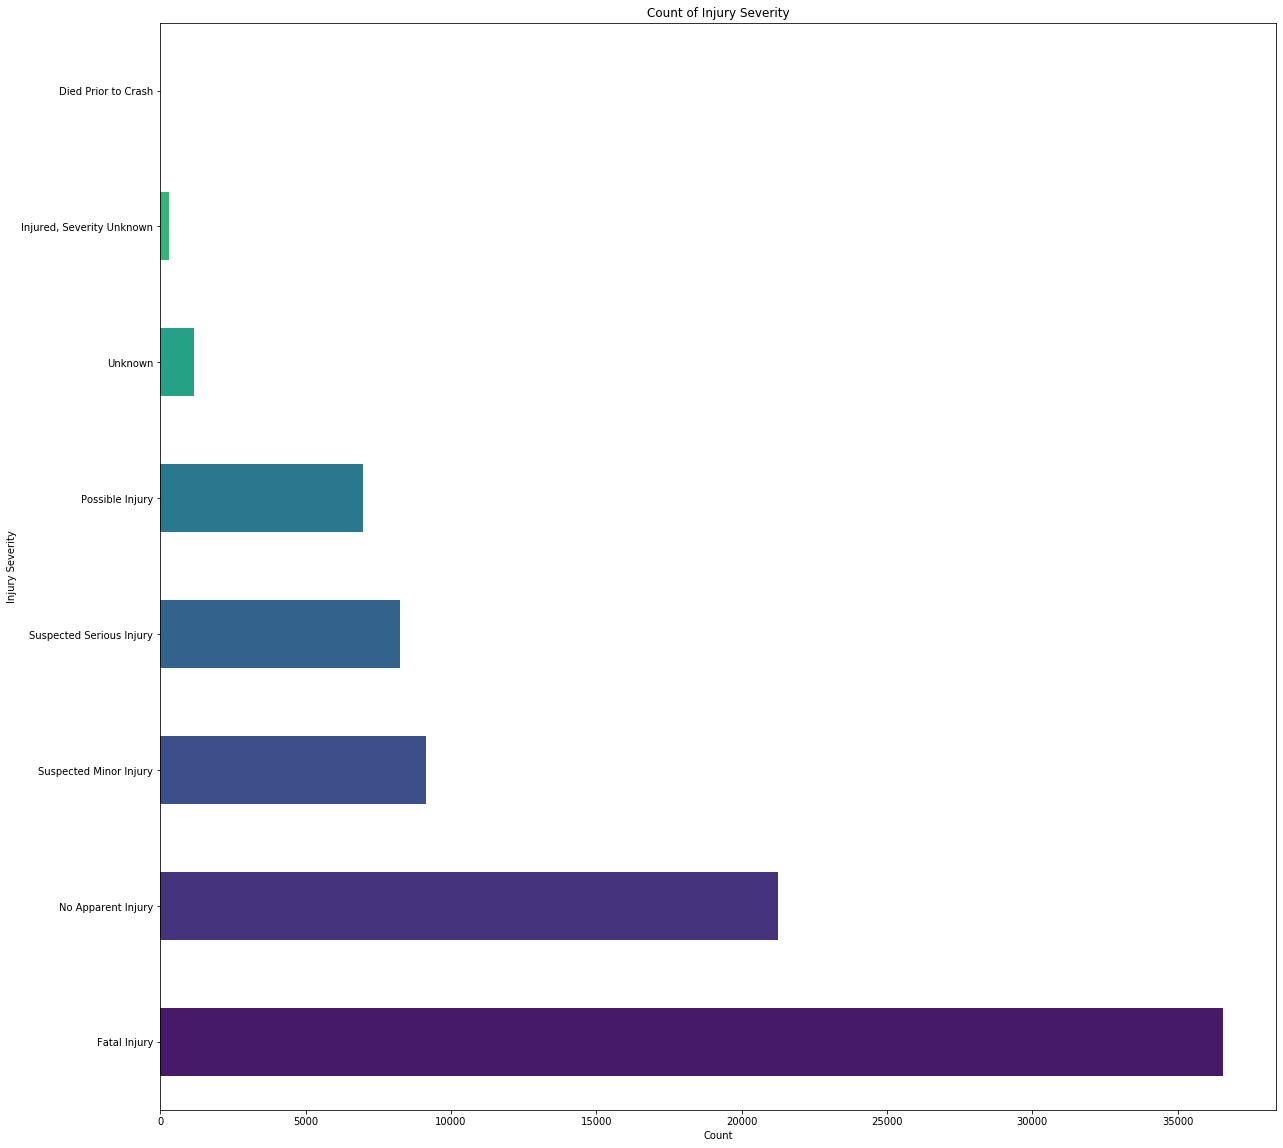

In [16]:
inj_counts = df_per.INJ_lvl.value_counts()
color1 = [COLOR_MAP[l] for l in range(len(inj_counts))]
fig, ax = plt.subplots(figsize=(20,20))
inj_counts.plot('barh', color = color1)
plt.xlabel('Count')
plt.ylabel('Injury Severity')
plt.title('Count of Injury Severity')
plt.savefig('Plots/inj_severity.png')
plt.show()

Merging person and accident datasets on ST_CASE as index

In [17]:
df = df_acc.merge(df_per)
df.head(5)

,ST_CASE,VE_TOTAL,PEDS,PERSONS,HOUR,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,...,AGE,SEX,INJ_SEV,REST_USE,EJECTION,DRINKING,ALC_DET,DRUGS,DRUG_DET,INJ_lvl
0,10001,2,0,1,6,0,2,4,1,0,...,55,1,4,20,2,0,9,0,8,Fatal Injury
1,10002,1,0,2,0,0,3,2,2,0,...,24,1,4,20,1,9,9,9,8,Fatal Injury
2,10002,1,0,2,0,0,3,2,2,0,...,24,1,4,3,0,8,9,8,8,Fatal Injury
3,10003,2,0,2,22,1,4,2,10,0,...,37,2,4,20,0,0,9,9,8,Fatal Injury
4,10003,2,0,2,22,1,4,2,10,0,...,36,1,2,20,0,0,9,0,8,Suspected Minor Injury


In [18]:
df_per = df_per[df_per.AGE <= 99]

In [19]:
bins = np.append(np.arange(0,90,5), [90,99])
df_per['age_bins'] = pd.cut(x=df_per.AGE, bins=bins)

Removing unreported sex data

In [20]:
df_per.SEX.value_counts()

1    53870
2    27603
8       60
9       11
Name: SEX, dtype: int64

In [21]:
df_per = df_per[df_per.SEX <= 3]

In [22]:
x_female

NameError: name 'x_female' is not defined

In [23]:
x_male

NameError: name 'x_male' is not defined

Histogram of the ages involved in all 2018 accidents

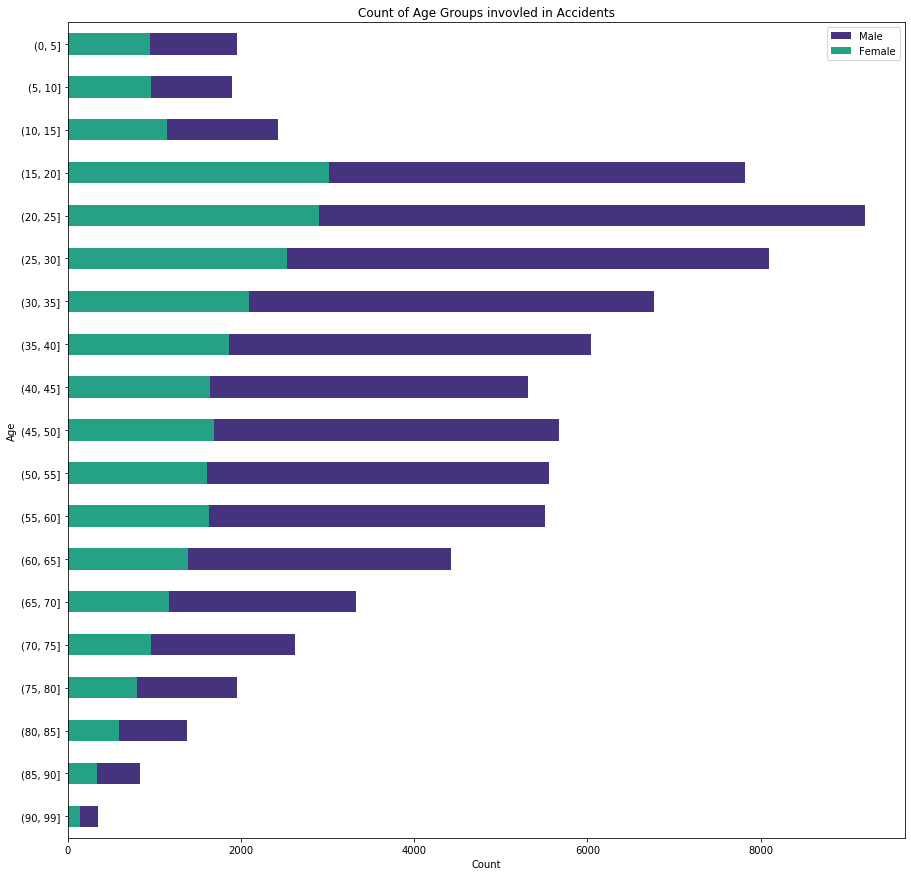

In [24]:
#x_male = df_per[df_per.SEX == 1].age_bins.value_counts().sort_index(ascending=False)
values = df_per.age_bins.value_counts().sort_index(ascending=False)
x_female = df_per[df_per.SEX == 2].age_bins.value_counts().sort_index(ascending=False)
#color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots(figsize=(15,15))
values.plot('barh', label = 'Male', color = COLOR_MAP[1])
x_female.plot('barh', label = 'Female', color = COLOR_MAP[5])
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Count of Age Groups invovled in Accidents')
plt.legend()
plt.savefig('Plots/age_groups.png')
plt.show()

In [25]:
drinkings = df_per.DRINKING.unique()
drinkings

array([0, 9, 8, 1])

In [26]:
def change(drinking):
    if drinking == 0:
        drinking = 'No'
    if drinking == 1:
        drinking = 'Yes'
    if drinking == 8:
        drinking = 'Not Reported'
    if drinking == 9:
        drinking = 'Unknown'
    return drinking

df_per['DRINKING_LVL'] = df_per.DRINKING.apply(change)

In [27]:
df_per.DRINKING.unique()

array([0, 9, 8, 1])

In [28]:
avg_inj = []
for i in drinkings:
    avg_inj.append(int(df_per[df_per['DRINKING'] == i].INJ_SEV.mean()))

In [29]:
ax.savefig?

Object `ax.savefig` not found.


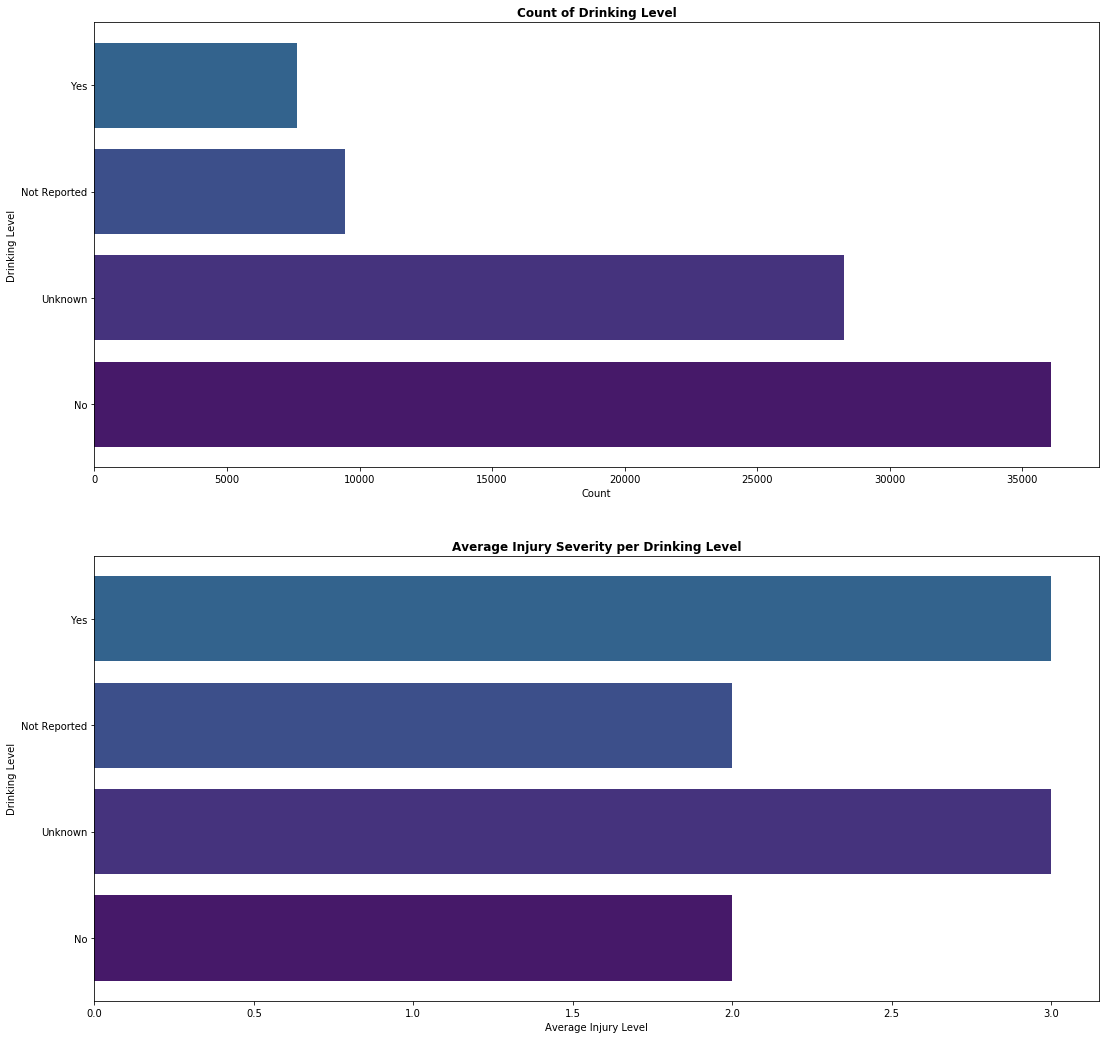

In [30]:
x = df_per.DRINKING_LVL.value_counts()
color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(18,18))
fig.subplots_adjust(hspace = 0.2, wspace=0.70)
ax[0].barh(df_per.DRINKING_LVL.unique(), x, color = color1)
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Drinking Level')
ax[0].set_title('Count of Drinking Level', fontweight='bold')

ax[1].barh(df_per.DRINKING_LVL.unique(), avg_inj, color = color1)
ax[1].set_xlabel('Average Injury Level')
ax[1].set_ylabel('Drinking Level')
ax[1].set_title('Average Injury Severity per Drinking Level', fontweight='bold')
plt.savefig('Plots/drinkings3.png')
plt.show()

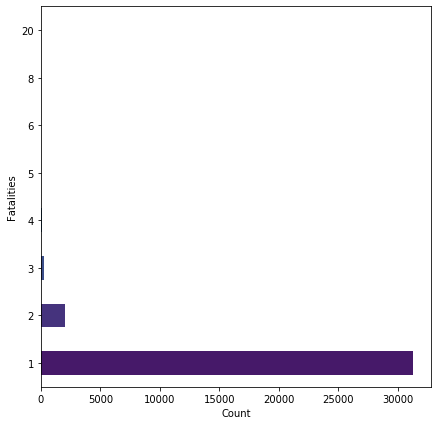

In [31]:
x = df_acc.FATALS.value_counts().sort_index(ascending=True)
color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots(figsize=(7,7))
x.plot('barh', color=color1)
plt.xlabel('Count')
plt.ylabel('Fatalities')
plt.savefig('Plots/fatalities.png')
plt.show()

In [32]:
num_of_drunks = df_acc['DRUNK_DR'].unique()
num_of_drunks

array([0, 1, 2, 3, 4])

In [33]:
num_of_peds = df_acc['PEDS'].unique()
num_of_peds

array([ 0,  1,  2,  3,  4,  6,  8,  5,  9,  7, 10])

In [34]:
avg_fat = np.zeros(len(num_of_drunks))
avg_ped = np.zeros(len(num_of_drunks))
avg_hour = np.zeros(len(num_of_drunks))
for i in num_of_drunks:
    avg_fat[i] = df_acc[df_acc['DRUNK_DR'] == i].FATALS.mean()
    avg_ped[i] = df_acc[df_acc['DRUNK_DR'] == i].PEDS.mean()
    avg_hour[i] = df_acc[df_acc['DRUNK_DR'] == i].HOUR.mean()

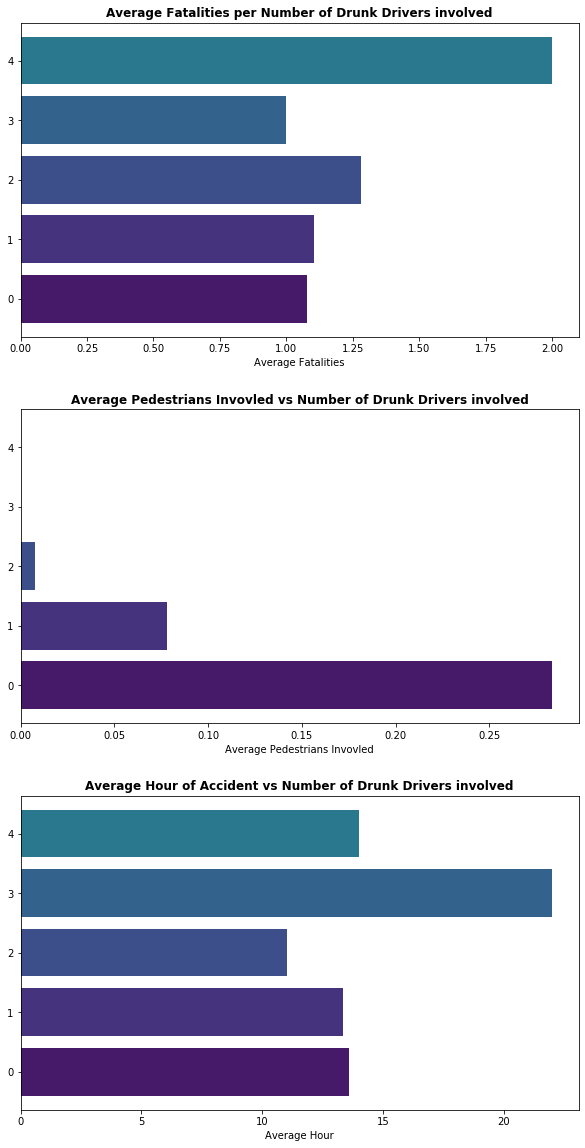

In [35]:
color1 = [COLOR_MAP[l] for l in range(len(num_of_drunks))]

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace = 0.23, wspace=0.70)
ax[0].barh(num_of_drunks, avg_fat, color = color1)
ax[0].set_xlabel('Average Fatalities')
ax[0].set_title('Average Fatalities per Number of Drunk Drivers involved',fontweight='bold')

ax[1].barh(num_of_drunks, avg_ped, color = color1)
ax[1].set_xlabel('Average Pedestrians Invovled')
ax[1].set_title('Average Pedestrians Invovled vs Number of Drunk Drivers involved',fontweight='bold')

ax[2].barh(num_of_drunks, avg_hour, color = color1)
ax[2].set_xlabel('Average Hour')
ax[2].set_title('Average Hour of Accident vs Number of Drunk Drivers involved',fontweight='bold')
plt.savefig('Plots/FatalsperDrnk.png')
plt.show()

In [36]:
df_per.columns

Index(['ST_CASE', 'VEH_NO', 'PER_NO', 'HOUR', 'MAKE', 'MAK_MOD', 'BODY_TYP',
       'MOD_YEAR', 'AGE', 'SEX', 'INJ_SEV', 'REST_USE', 'EJECTION', 'DRINKING',
       'ALC_DET', 'DRUGS', 'DRUG_DET', 'INJ_lvl', 'age_bins', 'DRINKING_LVL'],
      dtype='object')

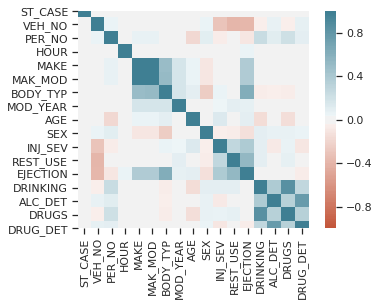

In [37]:
sns.set(style="ticks")
corr = df_per.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [38]:
df_per.columns

Index(['ST_CASE', 'VEH_NO', 'PER_NO', 'HOUR', 'MAKE', 'MAK_MOD', 'BODY_TYP',
       'MOD_YEAR', 'AGE', 'SEX', 'INJ_SEV', 'REST_USE', 'EJECTION', 'DRINKING',
       'ALC_DET', 'DRUGS', 'DRUG_DET', 'INJ_lvl', 'age_bins', 'DRINKING_LVL'],
      dtype='object')

In [39]:
df_acc.columns

Index(['ST_CASE', 'VE_TOTAL', 'PEDS', 'PERSONS', 'HOUR', 'WRK_ZONE',
       'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS', 'FATALS', 'DRUNK_DR'],
      dtype='object')

In [40]:
df_vehicle = pd.read_csv('VEHICLE.csv', encoding = 'latin1')
df_vehicle.columns

Index(['STATE', 'ST_CASE', 'VEH_NO', 'VE_FORMS', 'NUMOCCS', 'DAY', 'MONTH',
       'HOUR', 'MINUTE', 'HARM_EV',
       ...
       'P_CRASH2', 'P_CRASH3', 'PCRASH4', 'PCRASH5', 'ACC_TYPE', 'TRLR1VIN',
       'TRLR2VIN', 'TRLR3VIN', 'DEATHS', 'DR_DRINK'],
      dtype='object', length=107)

In [41]:
df_per

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,SEX,INJ_SEV,REST_USE,EJECTION,DRINKING,ALC_DET,DRUGS,DRUG_DET,INJ_lvl,age_bins,DRINKING_LVL
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,1,4,20,2,0,9,0,8,Fatal Injury,"(50, 55]",No
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,1,4,20,1,9,9,9,8,Fatal Injury,"(20, 25]",Unknown
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,1,4,3,0,8,9,8,8,Fatal Injury,"(20, 25]",Not Reported
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,2,4,20,0,0,9,9,8,Fatal Injury,"(35, 40]",No
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,1,2,20,0,0,9,0,8,Suspected Minor Injury,"(35, 40]",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83621,560099,1,1,18,34.0,34034.0,4.0,1994.0,61,1,4,20,2,9,9,9,8,Fatal Injury,"(60, 65]",Unknown
83622,560100,1,1,13,20.0,20036.0,2.0,2002.0,34,2,4,20,1,1,9,1,8,Fatal Injury,"(30, 35]",Yes
83623,560100,1,2,13,20.0,20036.0,2.0,2002.0,36,1,2,20,0,8,9,8,8,Suspected Minor Injury,"(35, 40]",Not Reported
83624,560101,1,1,18,20.0,20401.0,14.0,1992.0,40,1,4,20,1,1,9,9,8,Fatal Injury,"(35, 40]",Yes


In [42]:
#cols = ['BODY_TYP', 'MOD_YEAR', 'REST_USE', 'EJECTION', 'VE_FORMS', 'VSURCOND', 'ROLLOVER', 'LGT_COND', 'TRAV_SP']

In [43]:
df_veh = df_vehicle[['ST_CASE','VEH_NO','VE_FORMS','MAKE','BODY_TYP','MOD_YEAR','GVWR','VSURCOND','ROLLOVER', 'TRAV_SP', 'VSPD_LIM']]
df_veh

,ST_CASE,VEH_NO,VE_FORMS,MAKE,BODY_TYP,MOD_YEAR,GVWR,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM
0,10001,1,1,82,66,2018,3,1,1,60,70
1,10002,1,1,58,4,9999,0,2,0,120,70
2,10003,1,2,63,14,2008,0,2,0,65,55
3,10003,2,2,7,61,2001,2,2,0,70,55
4,10004,1,1,49,34,2004,0,1,0,999,70
...,...,...,...,...,...,...,...,...,...,...,...
51867,560098,2,2,20,34,2014,0,4,0,999,70
51868,560099,1,1,34,4,1994,0,4,1,81,75
51869,560100,1,1,20,2,2002,0,1,9,75,55
51870,560101,1,2,20,14,1992,0,1,1,999,55


In [44]:
final = df_per.merge(df_veh)
final.head(5)

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,SEX,...,DRUG_DET,INJ_lvl,age_bins,DRINKING_LVL,VE_FORMS,GVWR,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,1,...,8,Fatal Injury,"(50, 55]",No,1,3,1,1,60,70
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,1,...,8,Fatal Injury,"(20, 25]",Unknown,1,0,2,0,120,70
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,1,...,8,Fatal Injury,"(20, 25]",Not Reported,1,0,2,0,120,70
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,2,...,8,Fatal Injury,"(35, 40]",No,2,0,2,0,65,55
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,1,...,8,Suspected Minor Injury,"(35, 40]",No,2,2,2,0,70,55


In [45]:
final = final.drop(['SEX','DRUG_DET','ALC_DET','DRINKING_LVL','INJ_lvl'],axis=1)
final.head(5)

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,...,EJECTION,DRINKING,DRUGS,age_bins,VE_FORMS,GVWR,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,4,...,2,0,0,"(50, 55]",1,3,1,1,60,70
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,4,...,1,9,9,"(20, 25]",1,0,2,0,120,70
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,4,...,0,8,8,"(20, 25]",1,0,2,0,120,70
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,4,...,0,0,9,"(35, 40]",2,0,2,0,65,55
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,2,...,0,0,0,"(35, 40]",2,2,2,0,70,55


In [46]:
final.GVWR.value_counts()
#68k cases not applicable

0    66596
3     4787
2     1899
1       66
8       51
9       12
Name: GVWR, dtype: int64

In [47]:
final.ROLLOVER.value_counts()
#Rollover is always reported

0    60948
1     9758
2     1998
9      707
Name: ROLLOVER, dtype: int64

In [48]:
final.DRUGS.value_counts()
#half the data is missing drug data

8    31329
0    31262
9     7126
1     3694
Name: DRUGS, dtype: int64

In [49]:
final.REST_USE.value_counts()
#extracting whether seatbealt was used or not

3     42560
20    15831
99     4916
17     2529
19     1954
5      1244
8       778
4       728
98      639
10      628
2       466
1       275
12      264
11      206
16      173
29      161
97       59
Name: REST_USE, dtype: int64

In [50]:
final = final[(final.REST_USE == 3)|(final.REST_USE == 20)]
final.REST_USE = pd.factorize(final.REST_USE)[0]
final.REST_USE.value_counts()
##extracting whether seatbealt was used or not

1    42560
0    15831
Name: REST_USE, dtype: int64

In [51]:
final.MOD_YEAR.value_counts()

2017.0    3287
2015.0    3243
2005.0    3223
2006.0    3200
2004.0    3162
          ... 
1969.0       1
1950.0       1
1947.0       1
1942.0       1
2020.0       1
Name: MOD_YEAR, Length: 72, dtype: int64

In [52]:
final = final[(final['MOD_YEAR'] != 9999)&(final['MOD_YEAR'] != 9998)]
#removing unkown modyear or unreported

In [53]:
final.DRINKING.value_counts()

0    27765
8    20743
1     4873
9     4858
Name: DRINKING, dtype: int64

In [54]:
final = final.merge(df_acc[['ST_CASE','LGT_COND']])

In [55]:
final = final.drop(['GVWR','DRINKING','age_bins','DRUGS','MAK_MOD','ST_CASE','VEH_NO','PER_NO'],axis=1)
final

,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM,LGT_COND
0,6,82.0,66.0,2018.0,55,4,0,2,1,1,1,60,70,4
1,22,63.0,14.0,2008.0,37,4,0,0,2,2,0,65,55,2
2,22,7.0,61.0,2001.0,36,2,0,0,2,2,0,70,55,2
3,13,49.0,34.0,2004.0,58,0,1,0,1,1,0,999,70,1
4,13,49.0,34.0,2004.0,26,4,0,1,1,1,0,999,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58234,10,20.0,34.0,2014.0,63,4,1,0,2,4,0,999,70,1
58235,18,34.0,4.0,1994.0,61,4,0,2,1,4,1,81,75,2
58236,13,20.0,2.0,2002.0,34,4,0,1,1,1,9,75,55,1
58237,13,20.0,2.0,2002.0,36,2,0,0,1,1,9,75,55,1


In [56]:
final.EJECTION.value_counts()

0    52590
1     4326
2     1081
8       91
9       79
3       40
7       32
Name: EJECTION, dtype: int64

In [57]:
final = final[(final['EJECTION'] != 8)&(final['EJECTION'] != 9)&(final['EJECTION'] !=  7)]
#Taking only reported ejection values

In [58]:
final.EJECTION.value_counts()

0    52590
1     4326
2     1081
3       40
Name: EJECTION, dtype: int64

In [59]:
final.VSURCOND.value_counts()

1     47108
2      8082
4       827
3       548
98      474
0       370
10      177
99      153
6       140
11      105
8        41
5        10
7         2
Name: VSURCOND, dtype: int64

In [60]:
final = final[(final['VSURCOND'] != 98)&(final['VSURCOND'] != 99)]
final.VSURCOND.value_counts()

1     47108
2      8082
4       827
3       548
0       370
10      177
6       140
11      105
8        41
5        10
7         2
Name: VSURCOND, dtype: int64

In [61]:
final.to_csv('df_final_speed.csv')

In [62]:
final.to_csv()
final

,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM,LGT_COND
0,6,82.0,66.0,2018.0,55,4,0,2,1,1,1,60,70,4
1,22,63.0,14.0,2008.0,37,4,0,0,2,2,0,65,55,2
2,22,7.0,61.0,2001.0,36,2,0,0,2,2,0,70,55,2
3,13,49.0,34.0,2004.0,58,0,1,0,1,1,0,999,70,1
4,13,49.0,34.0,2004.0,26,4,0,1,1,1,0,999,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58234,10,20.0,34.0,2014.0,63,4,1,0,2,4,0,999,70,1
58235,18,34.0,4.0,1994.0,61,4,0,2,1,4,1,81,75,2
58236,13,20.0,2.0,2002.0,34,4,0,1,1,1,9,75,55,1
58237,13,20.0,2.0,2002.0,36,2,0,0,1,1,9,75,55,1


In [68]:
final.ROLLOVER.value_counts()

0    46932
1     8295
2     1640
9      543
Name: ROLLOVER, dtype: int64

In [34]:
final = pd.read_csv('df_final.csv')

In [35]:
y = final.INJ_SEV
x = final.drop('INJ_SEV',axis=1)

In [37]:
y

0        4
1        4
2        2
3        0
4        4
        ..
57405    4
57406    4
57407    4
57408    2
57409    4
Name: INJ_SEV, Length: 57410, dtype: int64

In [36]:
x

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,LGT_COND
0,0,6,82.0,66.0,2018.0,55,0,2,1,1,1,4
1,1,22,63.0,14.0,2008.0,37,0,0,2,2,0,2
2,2,22,7.0,61.0,2001.0,36,0,0,2,2,0,2
3,3,13,49.0,34.0,2004.0,58,1,0,1,1,0,1
4,4,13,49.0,34.0,2004.0,26,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57405,58234,10,20.0,34.0,2014.0,63,1,0,2,4,0,1
57406,58235,18,34.0,4.0,1994.0,61,0,2,1,4,1,2
57407,58236,13,20.0,2.0,2002.0,34,0,1,1,1,9,1
57408,58237,13,20.0,2.0,2002.0,36,0,0,1,1,9,1


In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [40]:
train_x

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,LGT_COND
3719,3831,2,34.0,4.0,1999.0,59,0,1,1,1,2,2
8929,9070,19,37.0,14.0,1997.0,18,1,0,2,1,1,5
31825,32148,11,82.0,66.0,1993.0,21,0,0,2,1,0,1
49531,50120,0,85.0,66.0,2016.0,54,0,0,2,2,0,2
8220,8353,5,65.0,2.0,2014.0,26,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
54343,55150,15,12.0,34.0,2005.0,47,0,0,2,1,1,1
38158,38563,20,12.0,14.0,2014.0,35,1,0,3,2,0,2
860,863,21,18.0,4.0,2007.0,21,0,0,2,1,0,2
15795,15974,20,59.0,14.0,2011.0,49,1,0,2,1,0,3


In [261]:
train_x.values.shape

(43057, 12)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_x, train_y)

In [ ]:
train_predictions = (rf.predict(train_x)).astype(int)
error = abs(train_predictions - train_y)
train_mse = (np.dot(error, error))/len(error)

test_predictions = (rf.predict(test_x)).astype(int)
error = abs(test_predictions - test_y)
test_mse = (np.dot(error, error))/len(error)
mse = [{'training mse': train_mse,
                     'test mse': test_mse}] 
mse = pd.DataFrame(mse)
mse

In [71]:
from sklearn.compose import ColumnTransformer as ctf
from sklearn.preprocessing import OneHotEncoder

In [72]:
make_dict = {12: 'Ford', 20: 'Chevrolet', 49: 'Toyota', 7: 'Dodge', 37: 'Honda',
            35: 'BMW', 23: 'GMC', 2: 'Jeep', 55: 'Hyundai'} #, 82: 'Freightliner'}

In [73]:
#Vehicle dataset for future integration with Rating system
df = pd.read_csv('df_final_speed.csv')

In [74]:
df

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM,LGT_COND
0,0,6,82.0,66.0,2018.0,55,4,0,2,1,1,1,60,70,4
1,1,22,63.0,14.0,2008.0,37,4,0,0,2,2,0,65,55,2
2,2,22,7.0,61.0,2001.0,36,2,0,0,2,2,0,70,55,2
3,3,13,49.0,34.0,2004.0,58,0,1,0,1,1,0,999,70,1
4,4,13,49.0,34.0,2004.0,26,4,0,1,1,1,0,999,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57405,58234,10,20.0,34.0,2014.0,63,4,1,0,2,4,0,999,70,1
57406,58235,18,34.0,4.0,1994.0,61,4,0,2,1,4,1,81,75,2
57407,58236,13,20.0,2.0,2002.0,34,4,0,1,1,1,9,75,55,1
57408,58237,13,20.0,2.0,2002.0,36,2,0,0,1,1,9,75,55,1


In [75]:
make_dict[12]

'Ford'

In [76]:
top9 = df.MAKE.value_counts().index[:9].tolist()

In [77]:
top9

[12.0, 20.0, 49.0, 7.0, 37.0, 35.0, 23.0, 2.0, 55.0]

In [78]:
body_dict = {4: 'Sedans', 34: 'Pickups', 14: 'SUVs', 15: 'SUV'} #, 2: '2doorSedans' (coupts)

In [79]:
df9 = df[df.MAKE.isin(top9)]
df9

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM,LGT_COND
2,2,22,7.0,61.0,2001.0,36,2,0,0,2,2,0,70,55,2
3,3,13,49.0,34.0,2004.0,58,0,1,0,1,1,0,999,70,1
4,4,13,49.0,34.0,2004.0,26,4,0,1,1,1,0,999,70,1
7,7,22,49.0,34.0,2011.0,23,0,1,0,1,1,0,75,70,2
8,8,9,20.0,34.0,2014.0,73,0,1,0,1,1,0,999,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57403,58232,2,35.0,34.0,2017.0,34,4,1,2,1,1,1,85,70,2
57405,58234,10,20.0,34.0,2014.0,63,4,1,0,2,4,0,999,70,1
57407,58236,13,20.0,2.0,2002.0,34,4,0,1,1,1,9,75,55,1
57408,58237,13,20.0,2.0,2002.0,36,2,0,0,1,1,9,75,55,1


In [80]:
top3 = df9.BODY_TYP.value_counts().index[:4].tolist()
top3

[4.0, 34.0, 14.0, 15.0]

In [81]:
dfs = df9[df9.BODY_TYP.isin(top3)]
dfs = dfs[dfs.TRAV_SP < 998]
dfs

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM,LGT_COND
7,7,22,49.0,34.0,2011.0,23,0,1,0,1,1,0,75,70,2
9,9,0,20.0,34.0,2004.0,40,0,1,0,2,1,0,70,70,2
11,11,12,2.0,14.0,2016.0,38,4,1,0,3,2,0,65,70,1
12,12,12,2.0,14.0,2016.0,30,3,1,0,3,2,0,65,70,1
20,20,21,55.0,4.0,2016.0,24,4,1,0,2,1,0,30,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57395,58224,8,12.0,34.0,1977.0,18,4,1,1,2,4,0,35,70,1
57396,58225,9,20.0,34.0,2008.0,39,1,1,0,1,4,1,50,80,1
57397,58226,9,20.0,34.0,2008.0,38,4,0,1,1,4,1,50,80,1
57398,58227,9,20.0,34.0,2008.0,41,1,1,0,1,4,1,50,80,1


In [82]:
dfs.BODY_TYP.value_counts()

4.0     5342
34.0    4220
14.0    3027
15.0    1141
Name: BODY_TYP, dtype: int64

In [83]:
def joinSUVs(body_type): #make all suvs have id 14
    if body_type == 15.0:
        return 14.0
    return body_type

In [84]:
def carMakes(make): #make all suvs have id 14
    return make_dict[make]

In [85]:
dfs['BODY_TYP'] = dfs.BODY_TYP.apply(joinSUVs)

In [86]:
dfs['MAKE'] = dfs.MAKE.apply(carMakes)

In [87]:
def carTypes(types): #make all suvs have id 14
    return body_dict[types]

In [88]:
dfs['BODY_TYP'] = dfs.BODY_TYP.apply(carTypes)
dfs

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,VSPD_LIM,LGT_COND
7,7,22,Toyota,Pickups,2011.0,23,0,1,0,1,1,0,75,70,2
9,9,0,Chevrolet,Pickups,2004.0,40,0,1,0,2,1,0,70,70,2
11,11,12,Jeep,SUVs,2016.0,38,4,1,0,3,2,0,65,70,1
12,12,12,Jeep,SUVs,2016.0,30,3,1,0,3,2,0,65,70,1
20,20,21,Hyundai,Sedans,2016.0,24,4,1,0,2,1,0,30,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57395,58224,8,Ford,Pickups,1977.0,18,4,1,1,2,4,0,35,70,1
57396,58225,9,Chevrolet,Pickups,2008.0,39,1,1,0,1,4,1,50,80,1
57397,58226,9,Chevrolet,Pickups,2008.0,38,4,0,1,1,4,1,50,80,1
57398,58227,9,Chevrolet,Pickups,2008.0,41,1,1,0,1,4,1,50,80,1


In [90]:
dfs.VSPD_LIM.value_counts()

55    3908
45    2607
65    1470
35    1239
70    1180
40     938
60     541
50     494
25     451
30     424
75     188
0       93
98      86
80      54
15      28
20      14
5        6
99       5
10       4
Name: VSPD_LIM, dtype: int64

In [89]:
dfs.LGT_COND.value_counts()

1    7053
2    3660
3    2294
5     318
4     291
6     100
7       6
9       5
8       3
Name: LGT_COND, dtype: int64

In [17]:
dfs.BODY_TYP.value_counts()

4.0     5342
34.0    4220
14.0    4168
Name: BODY_TYP, dtype: int64

In [18]:
X = dfs[['MAKE', 'BODY_TYP', 'TRAV_SP']].values
X, X.shape

(array([[49., 34., 75.],
        [20., 34., 70.],
        [ 2., 14., 65.],
        ...,
        [20., 34., 50.],
        [20., 34., 50.],
        [35., 34., 85.]]), (13730, 3))

In [78]:
ct = ctf([
    ('onehot', OneHotEncoder(), [0, 1]),
    ('nothing', 'passthrough', [2])
], sparse_threshold=0)

In [79]:
inputs = ct.fit_transform(X)

In [80]:
inputs, inputs.shape

(array([[ 0.,  0.,  0., ...,  0.,  1., 75.],
        [ 0.,  0.,  0., ...,  0.,  1., 70.],
        [ 1.,  0.,  0., ...,  1.,  0., 65.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  1., 50.],
        [ 0.,  0.,  0., ...,  0.,  1., 50.],
        [ 0.,  0.,  0., ...,  0.,  1., 85.]]), (13730, 13))

In [22]:
inputs[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1., 75.])

In [23]:
y = dfs.INJ_SEV.values
y

array([0, 0, 4, ..., 4, 1, 4])

In [24]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(inputs, y)

In [250]:
test = ct.fit_transform(X[:5])

In [252]:
test, y[:5]

(array([[ 0.,  0.,  1.,  0.,  0.,  0.,  1., 75.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  1., 70.],
        [ 1.,  0.,  0.,  0.,  0.,  1.,  0., 65.],
        [ 1.,  0.,  0.,  0.,  0.,  1.,  0., 65.],
        [ 0.,  0.,  0.,  1.,  1.,  0.,  0., 30.]]), array([0, 0, 4, 3, 4]))

In [255]:
test.shape

(5, 8)

In [258]:
clf.predict(inputs[:5])

array([4, 4, 4, 4, 0])

In [259]:
clf.score(inputs, y)

0.42811361981063367

In [28]:
clff = svm.SVC(decision_function_shape='ovr', kernel='sigmoid')
clff.fit(inputs, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
clff.score(inputs, y)

0.25462490895848505

array([0, 0, 4, ..., 4, 1, 4])

In [44]:
dfs = dfs[dfs['INJ_SEV'] < 5]
dfs

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,LGT_COND
7,7,22,49.0,34.0,2011.0,23,0,1,0,1,1,0,75,2
9,9,0,20.0,34.0,2004.0,40,0,1,0,2,1,0,70,2
11,11,12,2.0,14.0,2016.0,38,4,1,0,3,2,0,65,1
12,12,12,2.0,14.0,2016.0,30,3,1,0,3,2,0,65,1
20,20,21,55.0,4.0,2016.0,24,4,1,0,2,1,0,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57395,58224,8,12.0,34.0,1977.0,18,4,1,1,2,4,0,35,1
57396,58225,9,20.0,34.0,2008.0,39,1,1,0,1,4,1,50,1
57397,58226,9,20.0,34.0,2008.0,38,4,0,1,1,4,1,50,1
57398,58227,9,20.0,34.0,2008.0,41,1,1,0,1,4,1,50,1


In [88]:
dfs.AGE.values

98

In [75]:
x = dfs.TRAV_SP.values
y = dfs.INJ_SEV.values

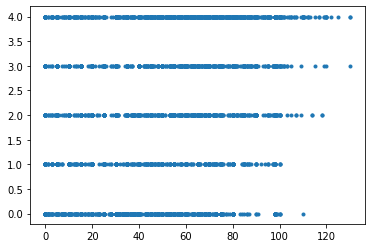

In [76]:
plt.scatter(x, y, marker='.')

In [ ]:
#a df.loc[(df['Year'] < 2018) & (df['Year'] <= 2019)]

train = dfs.loc[(2018 > df['Year'])]
test = df.loc[(2018 <= df['Year'])]

plt.figure(figsize=(10,6))
plt.scatter(train.Year, train.Close, label=r'${y}$ train', s=0.5)
plt.scatter(test.Year, test.Close, label=r'${y}$ test', s=0.5)
# plt.plot(train.Year, y, label=r'$\hat{y}$')
plt.xlabel('Year')
plt.ylabel('Close')
leg = plt.legend()

In [49]:
from sklearn.decomposition import PCA

In [53]:
cols = ['BODY_TYP', 'MOD_YEAR', 'REST_USE', 'EJECTION', 'VE_FORMS', 'VSURCOND', 'ROLLOVER', 'LGT_COND', 'TRAV_SP']

In [56]:
y = dfs.INJ_SEV
x = dfs[cols]
x.MOD_YEAR = 2019 - x.MOD_YEAR

In [57]:
x

,BODY_TYP,MOD_YEAR,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,LGT_COND,TRAV_SP
7,34.0,8.0,1,0,1,1,0,2,75
9,34.0,15.0,1,0,2,1,0,2,70
11,14.0,3.0,1,0,3,2,0,1,65
12,14.0,3.0,1,0,3,2,0,1,65
20,4.0,3.0,1,0,2,1,0,2,30
...,...,...,...,...,...,...,...,...,...
57395,34.0,42.0,1,1,2,4,0,1,35
57396,34.0,11.0,1,0,1,4,1,1,50
57397,34.0,11.0,0,1,1,4,1,1,50
57398,34.0,11.0,1,0,1,4,1,1,50


In [59]:
y = y.values
y

array([0, 0, 4, ..., 4, 1, 4])

In [60]:
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

explained variance ratio (first two components): [0.75093197 0.18957256]


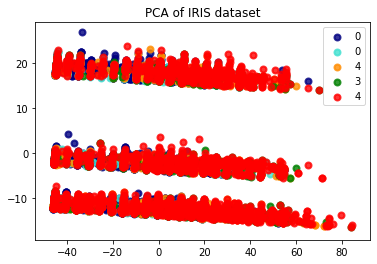

In [63]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'green', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], y):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=y[i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

# plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

plt.show()

In [65]:
sev0 = dfs[dfs['INJ_SEV'] == 0]
sev0

,Unnamed: 0,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,TRAV_SP,LGT_COND
7,7,22,49.0,34.0,2011.0,23,0,1,0,1,1,0,75,2
9,9,0,20.0,34.0,2004.0,40,0,1,0,2,1,0,70,2
25,25,13,37.0,4.0,2010.0,27,0,1,0,1,1,0,58,1
55,55,23,20.0,34.0,2006.0,31,0,0,0,1,2,0,45,2
61,61,5,12.0,34.0,2004.0,54,0,1,0,1,2,0,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57359,58188,23,23.0,14.0,2002.0,21,0,1,0,1,1,9,65,2
57361,58190,23,23.0,14.0,2002.0,24,0,0,0,1,1,9,65,2
57363,58192,16,20.0,14.0,2018.0,30,0,1,0,2,1,0,10,1
57370,58199,19,7.0,34.0,2006.0,22,0,1,0,1,1,0,60,2


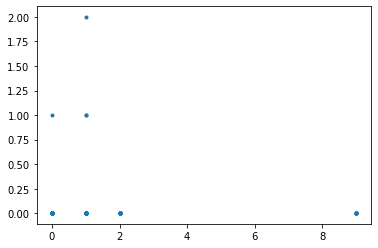

In [77]:
y = sev0.EJECTION.values
x = sev0.ROLLOVER.values
plt.scatter(x, y, marker='.')